This script recorded how to compare different spike sorting algorithm performances on different drift condition recordings.

In [1]:
from compare.compare import *
from utils import *

import numpy as np
import pickle as pkl
import shutil
import matplotlib.pyplot as plt

import ipywidgets as widgets

import MEArec as mr
import MEAutility as mu

import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.widgets as sw
from spikeinterface.core import WaveformExtractor

g:\anaconda3\envs\si_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
g:\anaconda3\envs\si_env\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
g:\anaconda3\envs\si_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
algo_list = ['KS25','KS3','HS2','SC','SC2','TC','TC2','MS5']

recording_path_list = [
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_toy'),
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_onlydrift_fast'),
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_onlydrift_slow'),
    Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_drift')
]

## Precision, Recall on time_agreement and waveform_cosine_similarity

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_toy
Loading GT and sorting..
Getting spike time..
Calculating time agreement matrix..


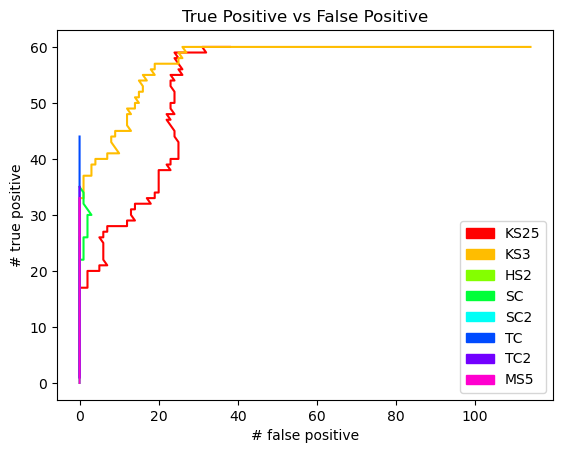

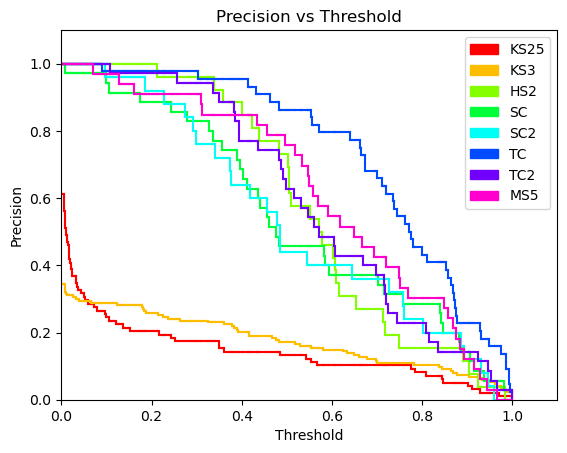

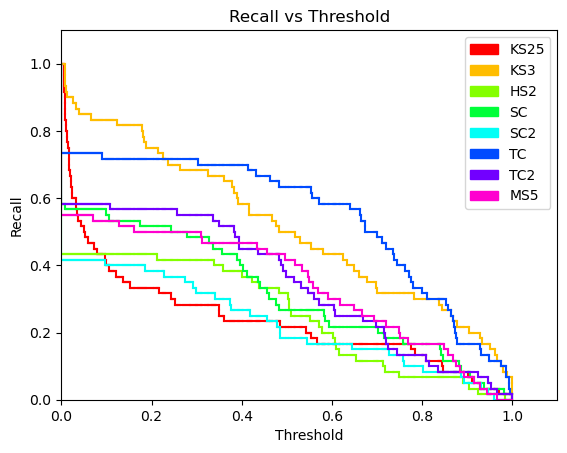

Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Calculating template waveform cosine similarity matrix..


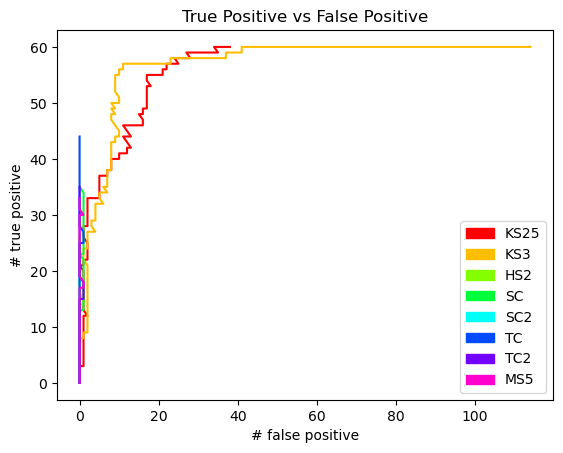

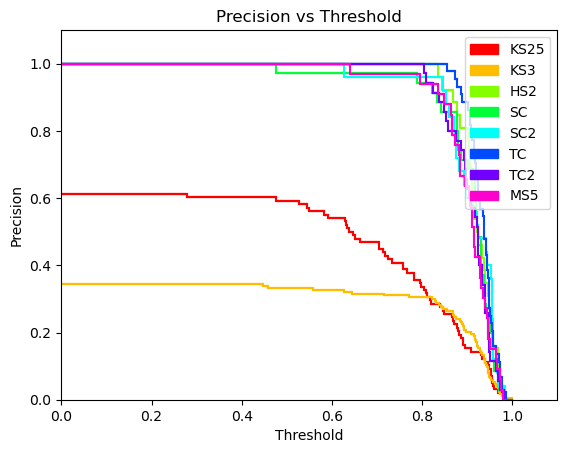

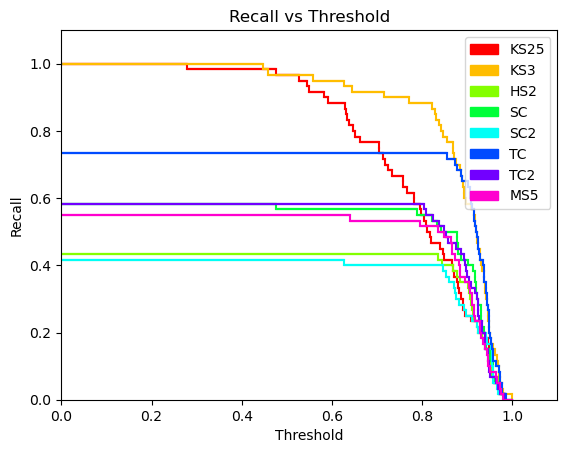

studies\mouse_VISp_L5_128ch\recordings\recording_toy finished!!!
Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_fast
Loading GT and sorting..
Getting spike time..
Calculating time agreement matrix..


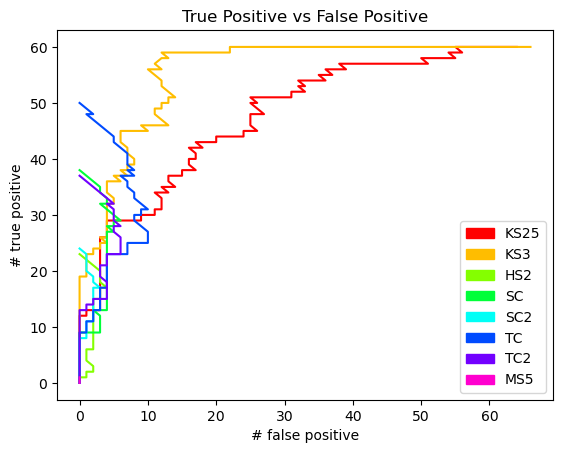

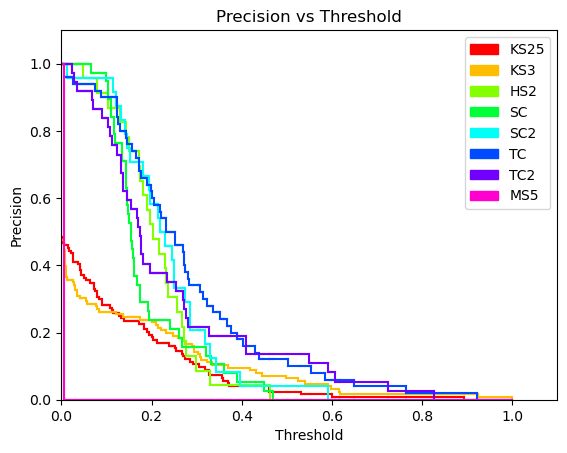

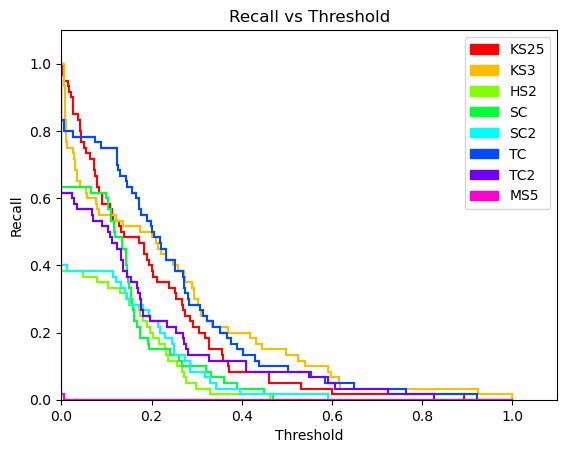

Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Calculating template waveform cosine similarity matrix..


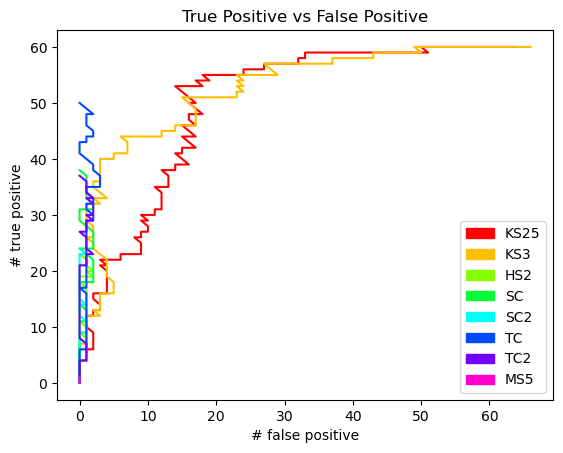

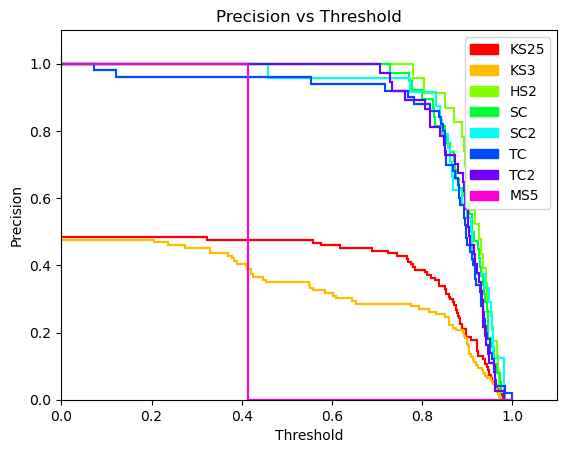

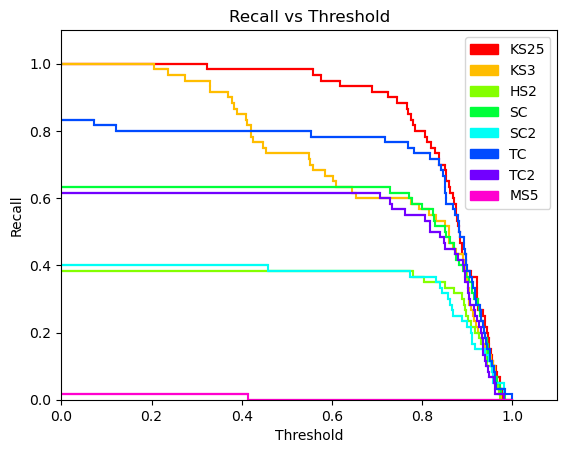

studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_fast finished!!!
Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_slow
Loading GT and sorting..
Getting spike time..
Calculating time agreement matrix..


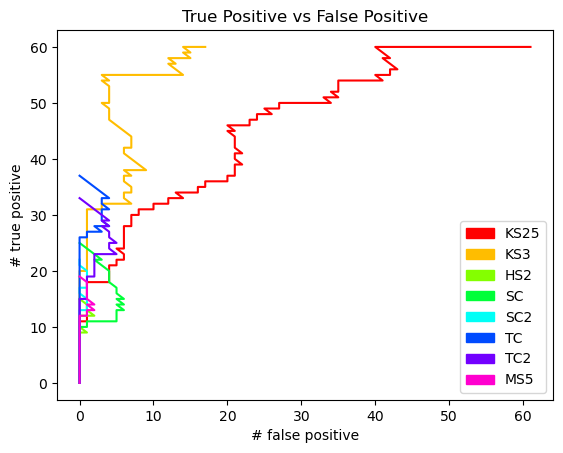

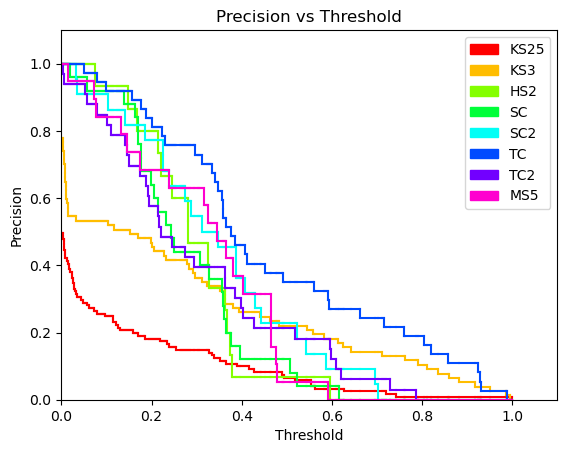

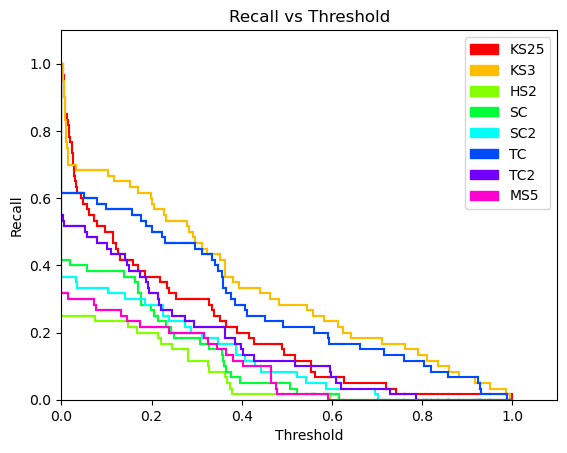

Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Calculating template waveform cosine similarity matrix..


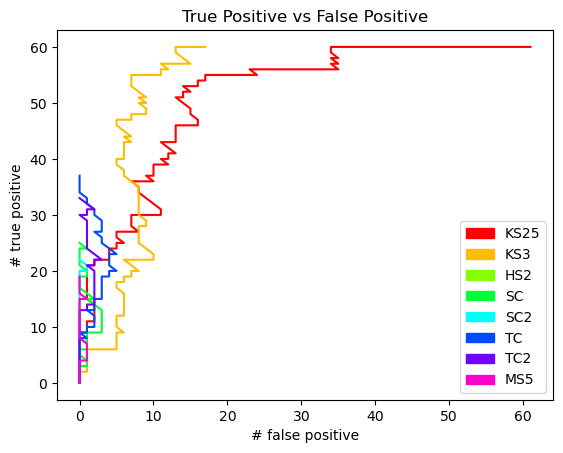

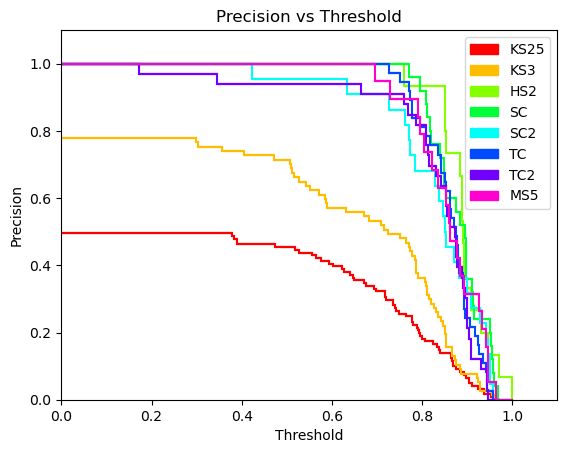

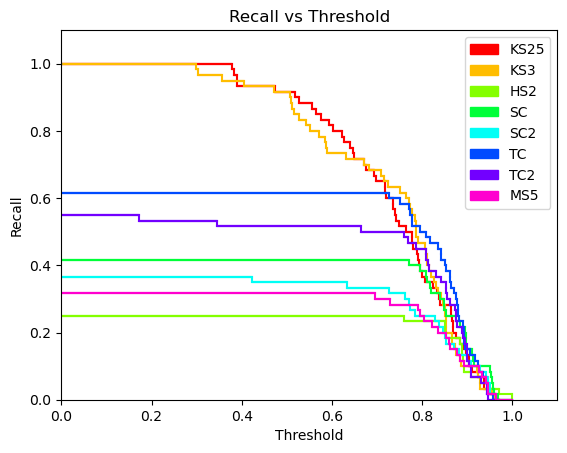

studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_slow finished!!!
Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_drift
Loading GT and sorting..
Getting spike time..
Calculating time agreement matrix..


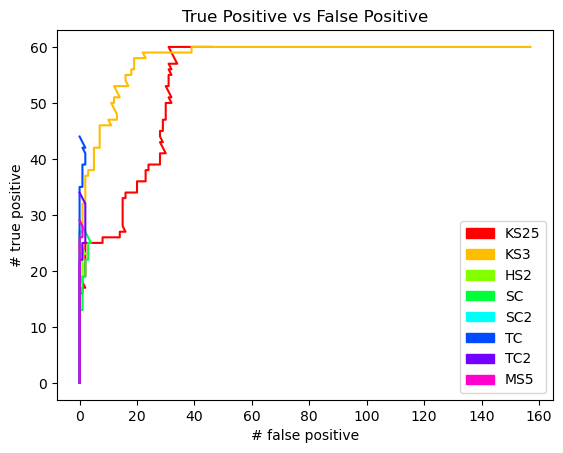

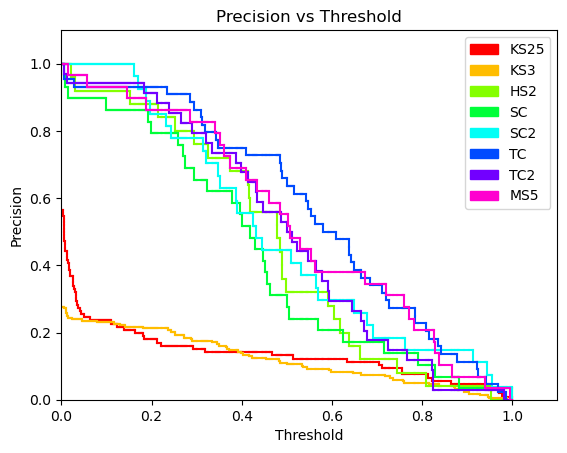

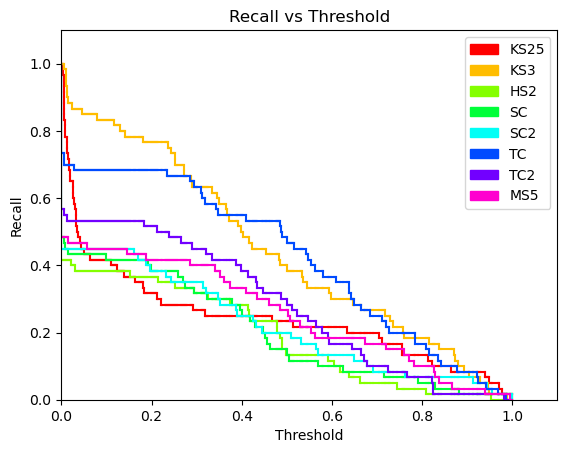

Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Calculating template waveform cosine similarity matrix..


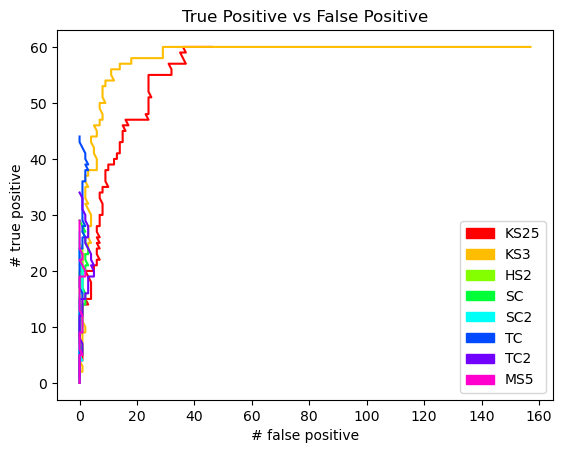

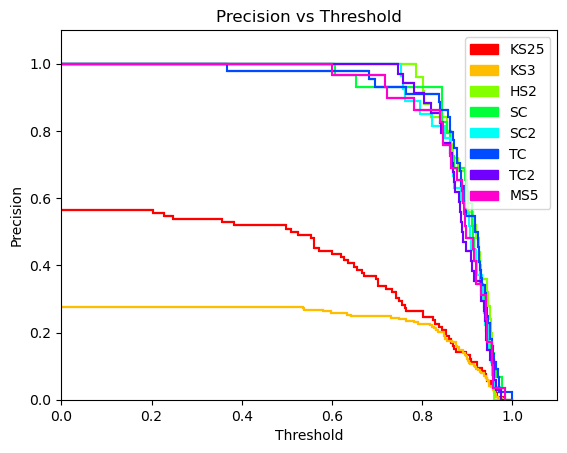

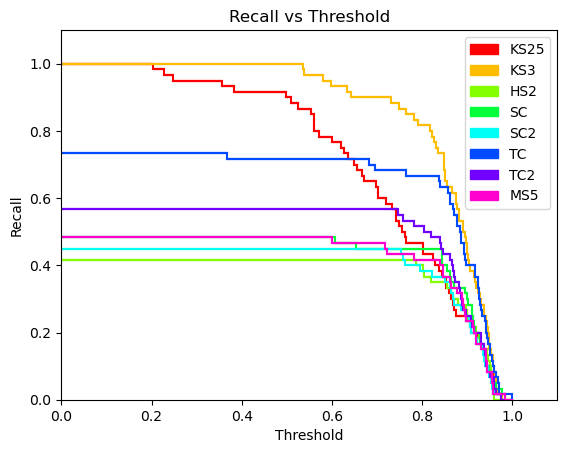

studies\mouse_VISp_L5_128ch\recordings\recording_drift finished!!!


In [5]:
for recording_path in recording_path_list:

    print(f'Current recording is {recording_path}')

    ############## loading GT and sorting
    print('Loading GT and sorting..')
    # load GT
    recording,sorting_GT = se.read_mearec((recording_path / 'recordings.h5').as_posix())
    # load sorting results
    sorting_KS25 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS25').as_posix(),keep_good_only=False)
    sorting_KS3 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS3').as_posix(),keep_good_only=False)

    sorting_HS2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'HS2').as_posix())
    sorting_SC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC').as_posix())
    sorting_SC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC2').as_posix())
    sorting_TC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC').as_posix())
    sorting_TC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC2').as_posix())

    # sorting_MS5
    sorting_MS5 = ss.NpzSortingExtractor.load_from_folder((recording_path / 'sorting_results' / 'MS5'/'ms5').as_posix())

    ############## GET SPIKE TIME
    print('Getting spike time..')
    spiketime_GT = get_spike_time_byUnitList(sorting_GT)
    for algo in algo_list:
        locals()["spiketime_"+algo] = get_spike_time_byUnitList(locals()["sorting_"+algo])

    ############ time_agreement
    print('Calculating time agreement matrix..')
    fs = sorting_GT.sampling_frequency
    tol = 0.1e-3

    time_agreement_list = []
    for algo in algo_list:
        time_agreement = time_agreement_matrix(spiketime_GT,locals()["spiketime_"+algo],fs,tol)
        time_agreement_list.append(time_agreement)

    plot_TP_vs_FP(time_agreement_list,algo_list)
    plot_precision_recall_vs_threshold(time_agreement_list,algo_list)

    ############# GET TEMPLATE WAVEFORM
    print('Getting template waveform..')
    # get GT template waveforms
    templates_GT = get_GT_templates(recording_path,ms_before=1,ms_after=2)

    # get algo template waveforms
    for algo in algo_list:
        we = WaveformExtractor(recording,locals()["sorting_"+algo],(recording_path / 'sorting_results' / algo).as_posix()) # 'waveforms'
        we.set_params(ms_before=1,ms_after=2,max_spikes_per_unit=1000)
        we.run_extract_waveforms()
        locals()["templates_"+algo] = we.get_all_templates().transpose((0,2,1)) # waveforms_algo (num_units, num_channels, num_samples)

    ############# cosine similarity
    print('Calculating template waveform cosine similarity matrix..')
    cos_sim_list = []
    for algo in algo_list:
        cos_sim = cosine_similarity_matrix(templates_GT,locals()["templates_"+algo])
        cos_sim_list.append(cos_sim)

    plot_TP_vs_FP(cos_sim_list,algo_list)
    plot_precision_recall_vs_threshold(cos_sim_list,algo_list)

    print(f'{recording_path} finished!!!')


## Multi-spikes (for splitting), subsets (for merging)

Define overlapping units, from template waveform similarity:
- one unit has high similarity with 2 or more GT (multi-spikes)
- several unit has high similarity with the same GT (sub-clusters)

## Unit number

In [3]:
recording_path = recording_path_list[-1]

print(f'Current recording is {recording_path}')
############## loading recording
print('Loading GT and sorting..')
# load GT
recording,sorting_GT = se.read_mearec((recording_path / 'recordings.h5').as_posix())
# load sorting results
sorting_KS25 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS25').as_posix(),keep_good_only=False)
sorting_KS3 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS3').as_posix(),keep_good_only=False)
sorting_HS2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'HS2').as_posix())
sorting_SC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC').as_posix())
sorting_SC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC2').as_posix())
sorting_TC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC').as_posix())
sorting_TC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC2').as_posix())
# sorting_MS5
sorting_MS5 = ss.NpzSortingExtractor.load_from_folder((recording_path / 'sorting_results' / 'MS5'/'ms5').as_posix())

############## GET SPIKE TIME
print('Getting spike time..')
spiketime_GT = get_spike_time_byUnitList(sorting_GT)
for algo in algo_list:
    locals()["spiketime_"+algo] = get_spike_time_byUnitList(locals()["sorting_"+algo])

############ time_agreement
print('Calculating time agreement matrix..')
fs = sorting_GT.sampling_frequency
tol = 0.1e-3

time_agreement_list = []
for algo in algo_list:
    time_agreement = time_agreement_matrix(spiketime_GT,locals()["spiketime_"+algo],fs,tol)
    time_agreement_list.append(time_agreement)

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_drift
Loading GT and sorting..
Getting spike time..
Calculating time agreement matrix..


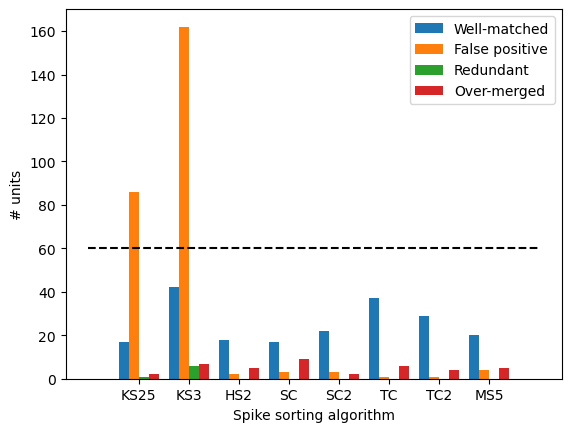

In [11]:
def plot_unit_category_count(matrix_list,algo_list,th=0.4):
    """plot # unit count in 4 categories:
    Well-matched: matched, only 1 agreement >= th  
    FP: all agreement < th 
    Redundant: unmatched, with only 1 agreement > th
    Overmerged: 2 or more agreement > th

    Args:
        matrix_list (list): matrix list of algos
        algo_list (list): list of algo name
        th (float, optional): threshold. Defaults to 0.4.

    Raises:
        ValueError: len(matrix_list) != len(algo_list)
    """    

    if len(matrix_list) != len(algo_list):
        raise ValueError('Illegal matrix_list or algo_list')

    N_GT = matrix_list[0].shape[0]

    # category
    Matched = np.zeros(len(algo_list))
    False_positive = np.zeros(len(algo_list))
    Over_split = np.zeros(len(algo_list))
    Over_merged = np.zeros(len(algo_list))

    for i_algo,matrix in enumerate(matrix_list):
        hotmap = matrix_diagmax_sort(matrix>=th)
        
        for i_unit in range(hotmap.shape[1]):
            # false positive
            if np.sum(hotmap[:,i_unit]) == 0:
                False_positive[i_algo] = False_positive[i_algo] + 1
                continue

            # matched
            if i_unit < N_GT and np.sum(hotmap[:,i_unit]) == 1:
                Matched[i_algo] = Matched[i_algo] + 1
                continue

            # over split
            if i_unit >= N_GT and np.sum(hotmap[:,i_unit]) == 1:
                Over_split[i_algo] = Over_split[i_algo] + 1
                continue

            # over merged
            if np.sum(hotmap[:,i_unit]) >= 2:
                Over_merged[i_algo] = Over_merged[i_algo] + 1
                continue

    # plot
    X_axis = np.arange(len(algo_list))

    plt.figure()
    plt.bar(X_axis-0.3,Matched,width=0.2,label = 'Well-matched')
    plt.bar(X_axis-0.1,False_positive,width=0.2,label = 'False positive')
    plt.bar(X_axis+0.1,Over_split,width=0.2,label = 'Redundant')
    plt.bar(X_axis+0.3,Over_merged,width=0.2,label = 'Over-merged')
    plt.plot([-1,np.max(X_axis)+1],[N_GT,N_GT],'k--')

    plt.xticks(X_axis,algo_list)
    plt.xlabel("Spike sorting algorithm")
    plt.ylabel("# units")
    plt.legend()
    plt.show()

########### count unit number 

plot_unit_category_count(time_agreement_list,algo_list,th=0.2)

# plot_unit_category_count(time_agreement_list,algo_list,th=0.8)



## Firing rate

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_toy
Loading GT and sorting..
Getting spike time..


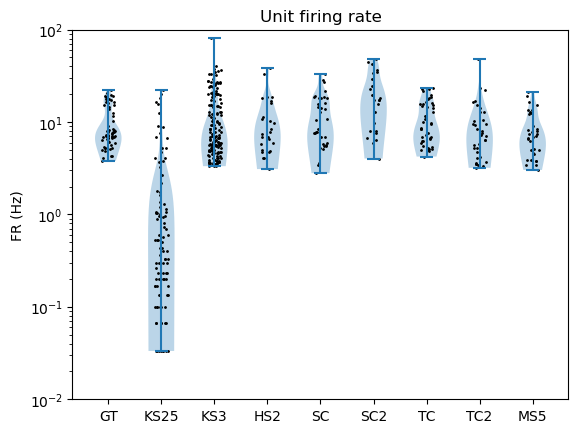

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_fast
Loading GT and sorting..
Getting spike time..


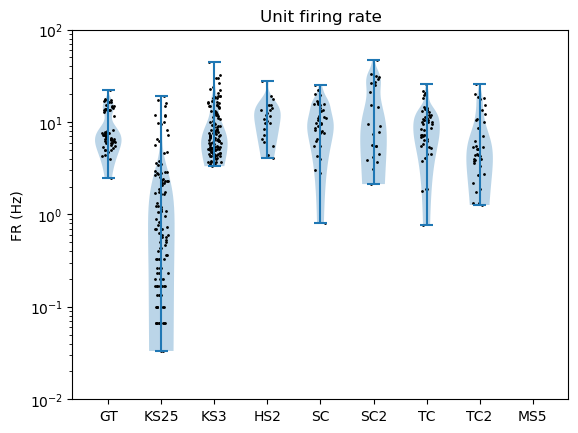

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_slow
Loading GT and sorting..
Getting spike time..


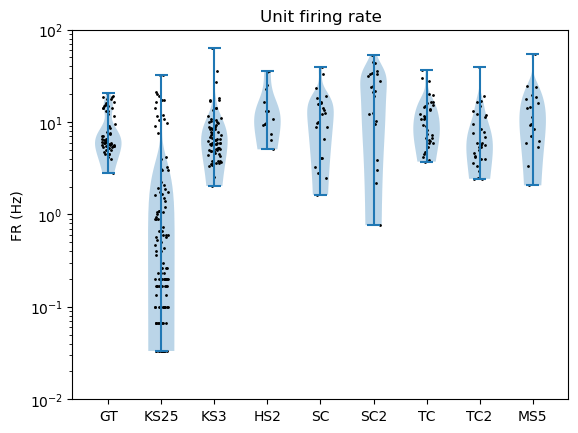

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_drift
Loading GT and sorting..
Getting spike time..


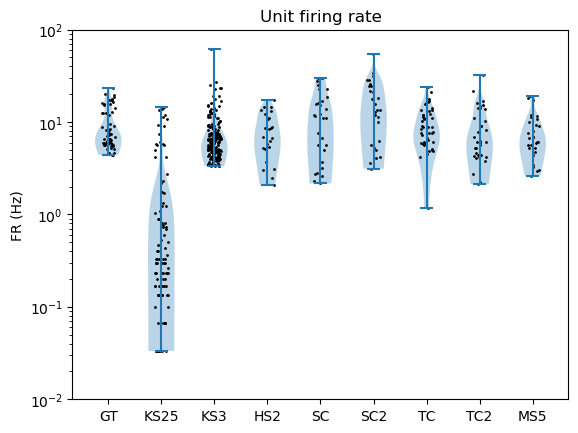

In [10]:
for recording_path in recording_path_list:

    print(f'Current recording is {recording_path}')

    ############## loading recording
    print('Loading GT and sorting..')
    # load GT
    recording,sorting_GT = se.read_mearec((recording_path / 'recordings.h5').as_posix())

    # load sorting results
    sorting_KS25 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS25').as_posix(),keep_good_only=False)
    sorting_KS3 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS3').as_posix(),keep_good_only=False)

    sorting_HS2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'HS2').as_posix())
    sorting_SC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC').as_posix())
    sorting_SC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC2').as_posix())
    sorting_TC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC').as_posix())
    sorting_TC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC2').as_posix())

    # sorting_MS5
    sorting_MS5 = ss.NpzSortingExtractor.load_from_folder((recording_path / 'sorting_results' / 'MS5'/'ms5').as_posix())

    ############## GET SPIKE TIME
    print('Getting spike time..')
    spiketime_GT = get_spike_time_byUnitList(sorting_GT)
    for algo in algo_list:
        locals()["spiketime_"+algo] = get_spike_time_byUnitList(locals()["sorting_"+algo])

    ############ compute firing rate
    FR_GT = firing_rate(recording,sorting_GT)
    for algo in algo_list:
        locals()["FR_"+algo] = firing_rate(recording,locals()["sorting_"+algo])
        locals()["FR_"+algo] = locals()["FR_"+algo][locals()["FR_"+algo] !=0]

    ######### plot FR violinplot
    plt.figure()
    plt.violinplot([FR_GT,FR_KS25,FR_KS3,FR_HS2,FR_SC,FR_SC2,FR_TC,FR_TC2,FR_MS5])
    plt.scatter((np.random.rand(FR_GT.shape[0])-0.5)*0.25+1,FR_GT,s=1,c='k')
    for i,algo in enumerate(algo_list):
        plt.scatter((np.random.rand(locals()["FR_"+algo].shape[0])-0.5)*0.25+i+2,locals()["FR_"+algo],s=1,c='k')
    plt.xticks([1,2,3,4,5,6,7,8,9],['GT','KS25','KS3','HS2','SC','SC2','TC','TC2','MS5'])
    plt.ylabel('FR (Hz)')
    plt.yscale('log')
    plt.ylim([1e-2,1e2])
    plt.title('Unit firing rate')
    plt.show()

In [9]:
print('done')

done


## SNR

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_toy
Loading GT and sorting..
Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Computing template SNR..


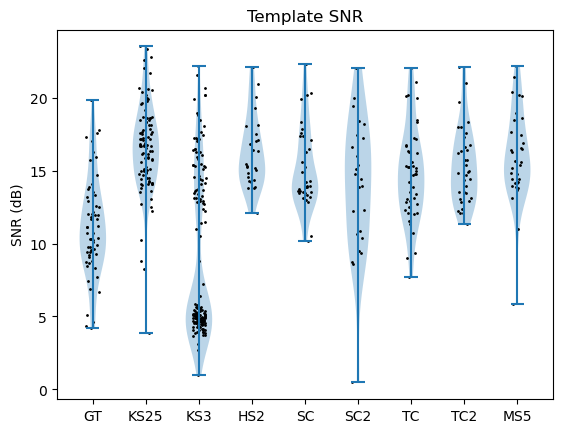

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_fast
Loading GT and sorting..
Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Computing template SNR..


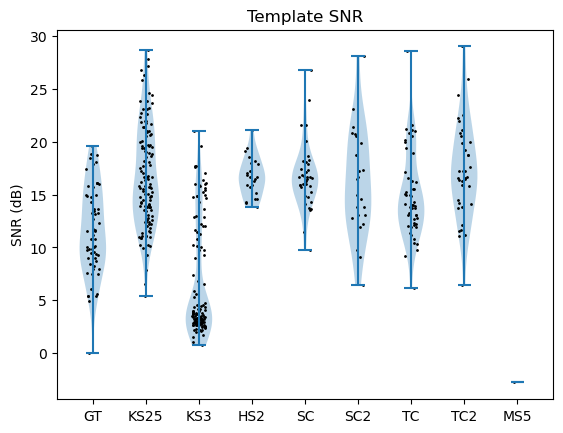

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_onlydrift_slow
Loading GT and sorting..
Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Computing template SNR..


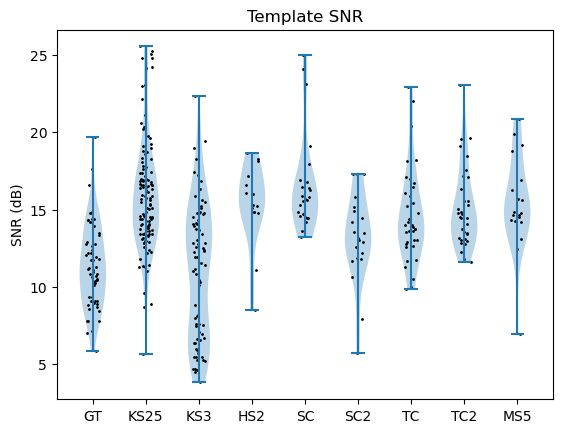

Current recording is studies\mouse_VISp_L5_128ch\recordings\recording_drift
Loading GT and sorting..
Getting template waveform..


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

Computing template SNR..


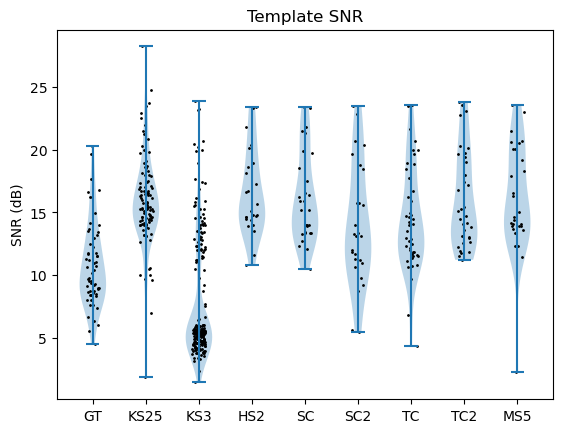

In [4]:
for recording_path in recording_path_list:

    print(f'Current recording is {recording_path}')

    ############## loading recording
    print('Loading GT and sorting..')
    # load GT
    recording,_ = se.read_mearec((recording_path / 'recordings.h5').as_posix())

    ############# GET TEMPLATE WAVEFORM
    print('Getting template waveform..')

    # get GT template waveforms
    templates_GT = get_GT_templates(recording_path,ms_before=1,ms_after=2)

    # load sorting results
    sorting_KS25 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS25').as_posix(),keep_good_only=False)
    sorting_KS3 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS3').as_posix(),keep_good_only=False)

    sorting_HS2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'HS2').as_posix())
    sorting_SC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC').as_posix())
    sorting_SC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC2').as_posix())
    sorting_TC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC').as_posix())
    sorting_TC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC2').as_posix())

    # sorting_MS5
    sorting_MS5 = ss.NpzSortingExtractor.load_from_folder((recording_path / 'sorting_results' / 'MS5'/'ms5').as_posix())

    # get algo template waveforms
    for algo in algo_list:
        we = WaveformExtractor(recording,locals()["sorting_"+algo],(recording_path / 'sorting_results' / algo).as_posix()) # 'waveforms'
        we.set_params(ms_before=1,ms_after=2,max_spikes_per_unit=1000)
        we.run_extract_waveforms()
        locals()["templates_"+algo] = we.get_all_templates().transpose((0,2,1)) # waveforms_algo (num_units, num_channels, num_samples)

    ########## compute SNR
    print('Computing template SNR..')

    SNR_GT = template_SNR(recording, templates_GT)
    for algo in algo_list:
        locals()["SNR_"+algo] =template_SNR(recording, locals()["templates_"+algo])

    ######### plot SNR violinplot
    plt.figure()
    plt.violinplot([SNR_GT,SNR_KS25,SNR_KS3,SNR_HS2,SNR_SC,SNR_SC2,SNR_TC,SNR_TC2,SNR_MS5])
    plt.scatter((np.random.rand(SNR_GT.shape[0])-0.5)*0.25+1,SNR_GT,s=1,c='k')
    for i,algo in enumerate(algo_list):
        plt.scatter((np.random.rand(locals()["SNR_"+algo].shape[0])-0.5)*0.25+i+2,locals()["SNR_"+algo],s=1,c='k')
    plt.xticks([1,2,3,4,5,6,7,8,9],['GT','KS25','KS3','HS2','SC','SC2','TC','TC2','MS5'])
    plt.ylabel('SNR (dB)')
    plt.title('Template SNR')
    plt.show()

### IS high-SNR GT unit more easily found by more algos?

The violinplot seems to tell that algos other than KS baised to find units with high SNR.

Since most of algos did not do well in fast drift condition, we set time agreement threshold = 0.2 as "found".

In [ ]:
recording_path = recording_path_list[-1]

print(f'Current recording is {recording_path}')

############## loading recording
print('Loading GT and sorting..')
# load GT
recording,_ = se.read_mearec((recording_path / 'recordings.h5').as_posix())
############# GET TEMPLATE WAVEFORM
print('Getting template waveform..')
# get GT template waveforms
templates_GT = get_GT_templates(recording_path,ms_before=1,ms_after=2)
# load sorting results
sorting_KS25 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS25').as_posix(),keep_good_only=False)
sorting_KS3 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS3').as_posix(),keep_good_only=False)
sorting_HS2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'HS2').as_posix())
sorting_SC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC').as_posix())
sorting_SC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC2').as_posix())
sorting_TC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC').as_posix())
sorting_TC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC2').as_posix())
# sorting_MS5
sorting_MS5 = ss.NpzSortingExtractor.load_from_folder((recording_path / 'sorting_results' / 'MS5'/'ms5').as_posix())
# get algo template waveforms
for algo in algo_list:
    we = WaveformExtractor(recording,locals()["sorting_"+algo],(recording_path / 'sorting_results' / algo).as_posix()) # 'waveforms'
    we.set_params(ms_before=1,ms_after=2,max_spikes_per_unit=1000)
    we.run_extract_waveforms()
    locals()["templates_"+algo] = we.get_all_templates().transpose((0,2,1)) # waveforms_algo (num_units, num_channels, num_samples)
########## compute SNR
print('Computing template SNR..')
SNR_GT = template_SNR(recording, templates_GT)

############ time_agreement
print('Calculating time agreement matrix..')
fs = sorting_GT.sampling_frequency
tol = 0.1e-3
time_agreement_list = []
for algo in algo_list:
    time_agreement = time_agreement_matrix(spiketime_GT,locals()["spiketime_"+algo],fs,tol)
    time_agreement_list.append(time_agreement)
    


Set time agreement threshold to 0.2..


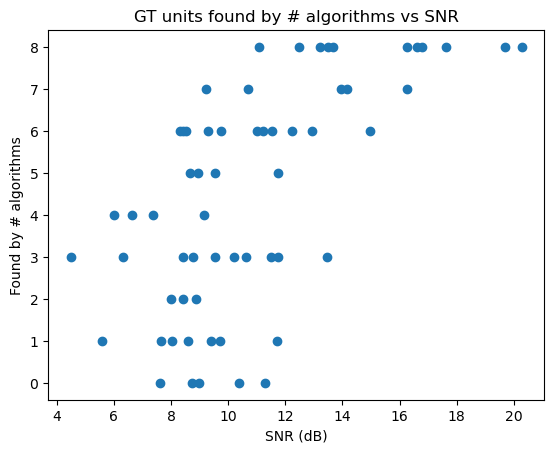

In [11]:
############# set time agreement threshold and count "found"
time_agreement_th = 0.2
print(f'Set time agreement threshold to {time_agreement_th}..')
count_found = np.zeros((len(spiketime_GT)))

for gt_i in range(count_found.shape[0]):
    for list_i,time_agreement in enumerate(time_agreement_list):    
        if np.max(time_agreement[gt_i,:]) >= time_agreement_th:
            count_found[gt_i] = count_found[gt_i] + 1
############## plot count vs SNR
plt.figure()
plt.scatter(SNR_GT, count_found)
plt.xlabel('SNR (dB)')
plt.ylabel('Found by # algorithms')
plt.title('GT units found by # algorithms vs SNR')
plt.show()

It looks like recording_drift have an obvious increase trend \# found algos with higher SNR. 